# PART 1: Tutorial on basic handling of digital images:

    by Raul Benitez
    Barcelona East School of Engineering, Universitat Politècnica de Catalunya
    Master's Degree in Interdisciplinary and Innovative Engineering
    Computer Vision 
    raul.benitez@upc.edu
    

# Introduction:

Welcome to this tutorial on basic handling of digital images in Python. We are going to use image processing libraries skimage. 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading a grayscale image

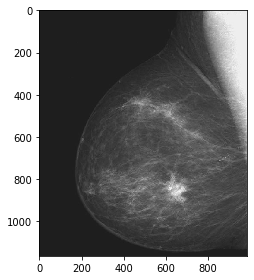

In [ ]:
import skimage as sk # load skimage libraries
from skimage.io import imread
I = sk.io.imread('/content/image1.tif') # read image using imread function
sk.io.imshow(I) # visualize image using imshow function
sk.io.show() 

Check image size:

In [ ]:
I.shape # Size of image in pixels // number of pixels: I.shape[0]*I.shape[1]

(1164, 984)

Access to origin pixel (top-left, DARK REGION) 

In [ ]:
I[0,0] # Pixel value of first row, first column

38

Access to top-right region (LIGHT REGION)

In [ ]:
I[0,983] # Pixel value of first row, last column

238

Digital encoding of the pixel grayscale levels: 

In [ ]:
I.dtype

dtype('uint8')

'uint8' stands for *unsigned integer of 8 bits*, meaning that each pixel in the image is encoded with 8 bits representing an integer in the range [0,255]. In general, a n-bit grayscale image allows a range in levels from 0 to $2^n - 1$. 

## Represent pixels along a certain row: 

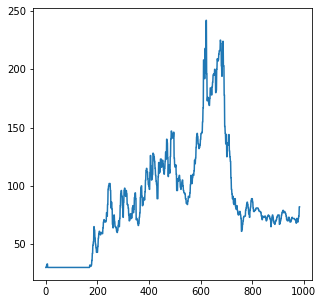

In [ ]:
Irow = I[850,:] # pixels along the row 850 

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
plt.plot(Irow)
plt.show()

## Read a RGB color image:

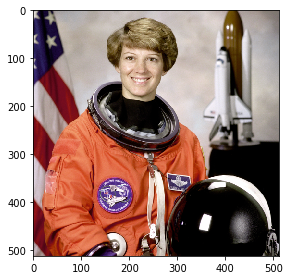

M = 512 columns, N = 512 rows, NC = 3 color channels


In [ ]:
import skimage as sk # load skimage libraries
IC = sk.data.astronaut() # load a color image from the skimage built-in dataset
# change colormap to visualize image
sk.io.imshow(IC) # visualize image using imshow function
sk.io.show() 
print('M = {} columns, N = {} rows, NC = {} color channels'.format(*IC.shape)) # Print out image size

Check image size:

In [ ]:
IC.shape # el tercer numero es els canals

(512, 512, 3)

## Convert color to grayscale:

$IG = 0.2125 \cdot R + 0.7154\cdot G + 0.0721\cdot B$


In [ ]:
IG = sk.color.rgb2gray(IC)
IG.shape

(512, 512)

/usr/local/lib/python3.8/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


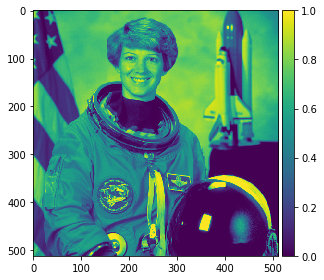

In [ ]:
IG_manual = (0.2125*IC[:,:,0]+0.7154*IC[:,:,1]+0.0721*IC[:,:,2])/255 # convert to grayscale
sk.io.imshow(IG_manual)

In [ ]:
IG[0,0]

0.5834349019607843

In [ ]:
import numpy as np
np.sum(IG-IG_manual)

-1.5090290128583206e-12

## Using colormaps

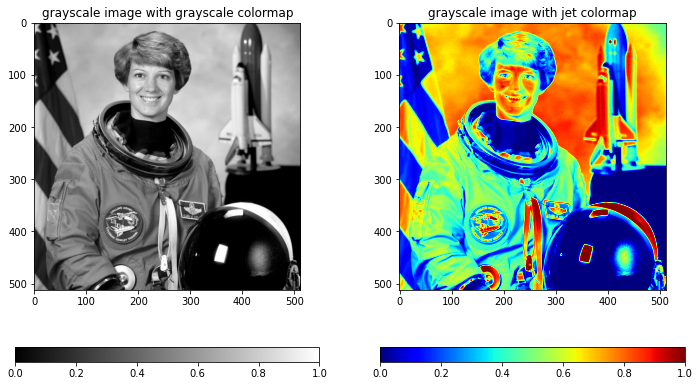

In [ ]:
import matplotlib.pyplot as plt 

fig,axes = plt.subplots(1,2,figsize=(12,7))
ax = axes.ravel() # convert axes to a 1d array
im1 = ax[0].imshow(IG,cmap=plt.cm.gray) # visualize image using imshow function using a grayscale colormap
ax[0].set_title('grayscale image with grayscale colormap') # set figure title
fig.colorbar(im1,ax=ax[0],orientation='horizontal') # visualize colorbar 

im2 = ax[1].imshow(IG,cmap=plt.cm.jet) # visualize image using imshow function using a jet colormap
ax[1].set_title('grayscale image with jet colormap') # set figure title
fig.colorbar(im2,ax=ax[1],orientation='horizontal') # visualize colorbar 
sk.io.show() 

## Miscellaneous operations and extra stuff:

# Convert image to different formats:
Convert an image to unsigned byte format, with values in [0, 255].


In [ ]:
from skimage.util import img_as_ubyte
IGB = img_as_ubyte(IG)

In [ ]:
np.sum(IGB)

29540405

## Image histogram:

Distribution of pixel values, how many pixels are there in the image for each grayscale level? 


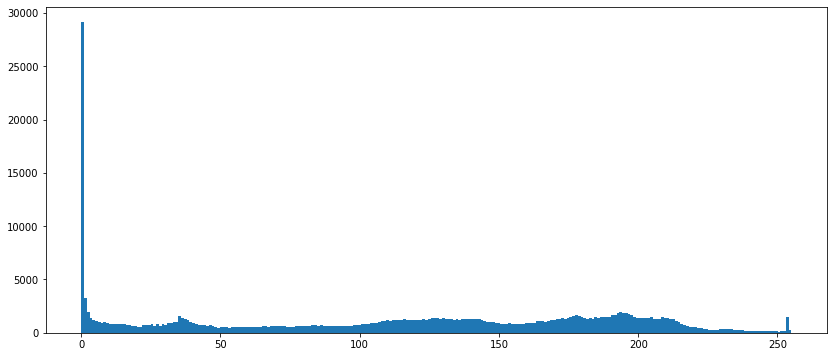

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

# reshape the uint8 image as 1d array:
v = IGB.reshape(IGB.shape[0]*IGB.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False) # bins = bits+1
plt.show()

In [ ]:
v.shape # total number of pixels
v[v==0].shape # black pixels

(29129,)

In [ ]:
p0 = (v[v==0].shape[0])/(v.shape[0])
p0

0.11111831665039062

There are too many zeros in the image, take them out in order to properly visualize the distribution: 

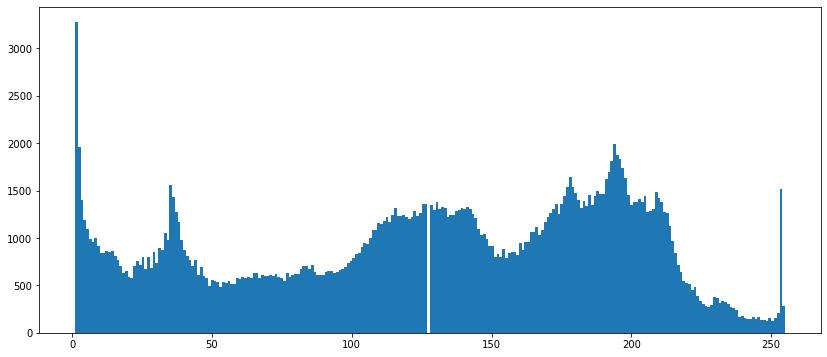

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

# keep only pixels with a value higher than zero: 
v = v[v>0]
fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

 Represent the normalized histogram corresponding to the probability distribution function of the graylevel pixel occurence

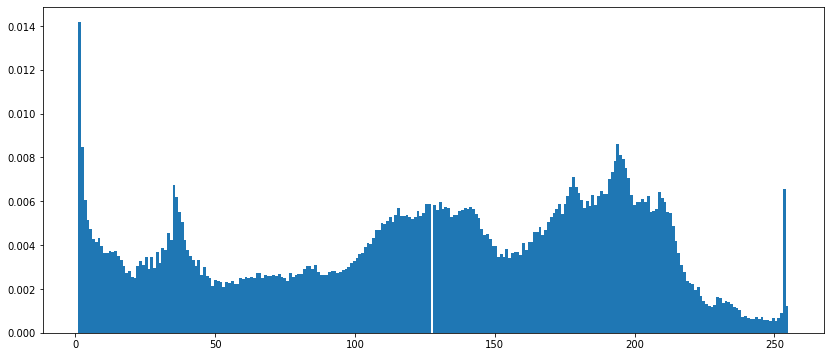

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 

# keep only pixels with a value higher than zero: 
fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=True)
plt.show()

Cummulative probability distribution function (cdf) of grayscale levels: Area over the curve of the normalized histogram

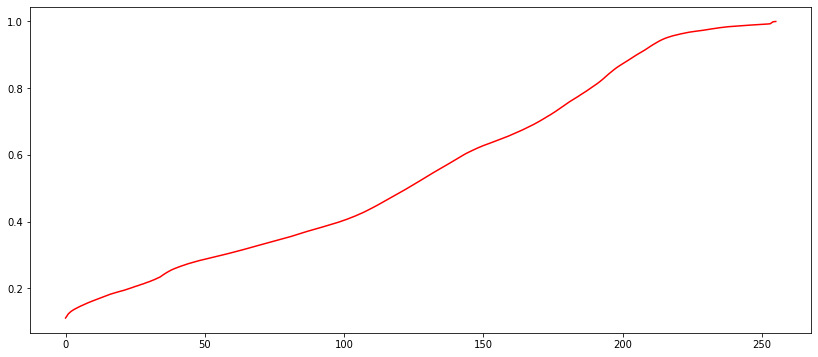

In [ ]:
from skimage import exposure

img_cdf, bins = exposure.cumulative_distribution(IGB, 255)
fig = plt.figure(figsize=(14, 6))
plt.plot(bins,img_cdf,'r')
plt.show()

Compute the median of the image (grayscale level at which the cdf is 0.5): 

In [ ]:
v = IGB.reshape(IGB.shape[0]*IGB.shape[1],1) # when do I reach 0.5 in the image
np.median(v)

123.0